## Final Project Submission

Please fill out:
* Student name: David Schenck
* Student pace: Flex
* Scheduled project review date/time: June 2, 2023, 12:30 pm Mountain Time
* Instructor name: Morgan Jones
* Blog post URL: https://wordpress.com/home/daviddata24.wordpress.com

# Phase 1 Project
In this hypothetical scenario, Microsoft wants to start a movie studio and has asked me to look at historical movie data to try to determine what works and what does not.

The two metrics I will use to measure success are profit and viewer ratings. Microsoft is going to want their new studio to be profitable, so my recommendations will be based on what has made movies profitable in the past. In addition to making money, I want to make sure that the new studio's movies are well-received, particularly the first few releases, because a positive first impression will make people more likely to want to see future movies. That is why I am also looking at trends for movies with both high and low ratings.

The three main factors I will look at are budget, genre, and star-power.
Budget: Microsoft will want to know how much capital to invest into the new studio in order to realistically make a large profit.

Genre: I will look through movies released in the US market to determine which genres tend to make the most money and receive the highest praise.

Star-power: I want to determine if having recognizable actors/directors involved in a movie affects profit or ratings. This is the most challenging factor to tease out of the data because I need to come up with a metric for how much "star-power" a person has as a function of time throughout their career.

# Data Exploration
I am going to start by just reading in the data and seeing what info is included.

In [1]:
import pandas as pd

In [2]:
#Define a path to where all the data is kept
dir_path = 'C:/Users/david/Documents/Flatiron/phase_1/Phase1-Microsoft-Movie-Studio/'

## Box Office Mojo
The Box Office Mojo data includes title, studio, domestic and foreign gross, and the year.
The data only dates back to 2010.

In [3]:
#Box Office Mojo
df = pd.read_csv(dir_path+'Data/bom.movie_gross.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [6]:
df.year.min()

2010

# Rotten Tomatoes Information
This dataset includes information about genre, rating, director, writer, release date, box office, runtime, and studio.
Strangely, it doesn't actually include the title of the movie. I will look to see if that is in a different dataset.

In [7]:
#Rotten Tomatoes Information
df = pd.read_csv(dir_path+'Data/rt.movie_info.tsv',sep='\t')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


# Rotten Tomatoes Reviews
This dataset includes reviews of each movie. Again, the movie title is not included. The ID allows for this dataset to be joined with the previous Rotten Tomatoes dataset which also does not contain movie titles.
Based on my current plans, I do not expect to use this dataset.

In [10]:
#Rotten Tomatoes Reviews
df = pd.read_csv(dir_path+'Data/rt.reviews.tsv', sep='\t', encoding = 'latin1')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [12]:
df.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


# TheMovieDB
This dataset contains genre, title, popularity, release date, vote average, and vote count.
I will need to do a little research to figure out how some of these columns are calculated.
What is popularity? Does more votes automatically mean the movie was well received?

After looking into the data more closely, some movies show up multiple times with identical information. I am not sure why, but if I use this dataset, I should try to remove the duplicates. There are a little over 1000 duplicates.

Popularity: I looked this up and it seems like popularity is just a measure of how much people are engaging with the movie on the website. It also looks like something that changes day-to-day, so chances are the popularity score in the table is just from the day the data was pulled. I do not actually think popularity is a useful metric for my analysis.

I tried merging this dataset with the dataset from TheNumbers because I wanted to see how hard it would be. What I found is that a little fewer than 100 movies couldn't be crosslisted by title, and when I checked the titles to see why, it actually turns out TheMovieDB data just doesn't have many of them (including big releases). I think this is just because of when the data was pulled. For example, Captain Marvel is not in this dataset, but there is currently a webpage for it on TheMovieDB. This does make me less likely to utilize this dataset. That is okay. The main thing I wanted from it was user ratings, but IMDB has that, too.

In [13]:
#TheMovieDB
df = pd.read_csv(dir_path+'Data/tmdb.movies.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [15]:
df.drop_duplicates(subset='id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25497 non-null  int64  
 1   genre_ids          25497 non-null  object 
 2   id                 25497 non-null  int64  
 3   original_language  25497 non-null  object 
 4   original_title     25497 non-null  object 
 5   popularity         25497 non-null  float64
 6   release_date       25497 non-null  object 
 7   title              25497 non-null  object 
 8   vote_average       25497 non-null  float64
 9   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


# The Numbers
This dataset includes release date, title, budget, and both domestic and worldwide gross.
Production budget is one of the things I want to use in my analysis, so I will use this dataset.

In [16]:
#The Numbers
df = pd.read_csv(dir_path+'Data/tn.movie_budgets.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


# IMDB
There are 8 tables in this database:
1. persons: This includes 606,648 people, but many are from the distant past or they are not known to the American movie audience. I will want to only keep those who are featured in major movies released in the US.

2. principals: This lists the principal actors and directors of each movie.

3. known_for: I looked up what this means specifically, and it only includes 4 movies per person. This is not particularly helpful for what I want to do.

4. directors: Lists the movies directed by each person.

5. writers: Lists the movies written by each person.

6. movie_basics: For each movie, it lists the title, year, and genres. I will want to filter the 146,144 movies down to just major movies released in the US.

7. movie_ratings: Lists average rating of each movie and the number of votes. I do not know where the ratings are coming from (are they professional critics or just user ratings). My guess is that it has to just be user ratings because some movies have hundreds of thousands of votes.

8. movie_akas: Is the only table that includes the regions in which the movies were released. This will be needed to find movies released in the US.


The earliest movie in the database is from 2010.

In [19]:
import sqlite3

In [20]:
#IMDB
conn = sqlite3.connect(dir_path+'im.db/im.db')

In [21]:
pd.read_sql("""
SELECT *
  FROM persons;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [22]:
pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [23]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Budget
Plan: Only one of the datasets includes information on budget (The Numbers). This dataset includes 5782 rows. This is far fewer than the total number of movies listed on TheNumbers.com, which makes me think this has already been filtered to some extent. I will first see what kind of movies are included in the dataset.

In [24]:
df = pd.read_csv(dir_path+'Data/tn.movie_budgets.csv')

In [25]:
#The release date is not formatted as a date datatype, so I convert it.
df.release_date = pd.to_datetime(df.release_date, format = '%b %d, %Y')

In [26]:
#I want to be able to treat the monetary columns as numbers instead of text, so I convert each one to float.
#I also make it so they are measured in millions of dollars
df.production_budget = df.production_budget.replace('[\$,]', '', regex=True).astype(float)/1000000
df.domestic_gross = df.domestic_gross.replace('[\$,]', '', regex=True).astype(float)/1000000
df.worldwide_gross = df.worldwide_gross.replace('[\$,]', '', regex=True).astype(float)/1000000

In [27]:
df.sort_values(by='release_date').head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,0.110000,10.0,11.000
5523,24,1916-09-05,Intolerance,0.385907,0.0,0.000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.0,8.000
5683,84,1920-09-17,Over the Hill to the Poorhouse,0.100000,3.0,3.000
5606,7,1925-11-19,The Big Parade,0.245000,11.0,22.000
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3.900000,9.0,9.000
4984,85,1927-08-12,Wings,2.000000,0.0,0.000
5524,25,1929-02-01,The Broadway Melody,0.379000,2.8,4.358
4559,60,1930-11-15,Hell's Angels,4.000000,0.0,0.000
5423,24,1931-12-26,Mata Hari,0.558000,0.9,0.900


The earliest movie in the database was released in 1915. That is pretty cool, but I do not think movies from many decades ago are going to help find trends among the modern movie industry. I am going to only include movies in the last 30 years (back to 1993). This still includes most of the data (5103 movies).

I also notice that some movies have a domestic and/or worldwide gross that is equal to 0 dollars.
I looked into one example (Bright) and the webpage for Bright on TheNumbers.com does not show a gross of 0, but instead just a dash. I think this means 0 is just a placeholder from an unknown amount. Ignoring movies with unknown domestic_gross leaves 4580 movies.

In [28]:
df[df.release_date > '1993-01-01'][df.domestic_gross > 0].sort_values(by = 'release_date', ascending = False)

<ipython-input-28-66b5b7912ea5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.release_date > '1993-01-01'][df.domestic_gross > 0].sort_values(by = 'release_date', ascending = False)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000
1997,98,2019-06-14,Shaft,30.0,0.600000,0.600000
4534,35,2019-06-07,Late Night,4.0,0.246305,0.246305
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350
580,81,2019-06-07,The Secret Life of Pets 2,80.0,63.795655,113.351496
...,...,...,...,...,...,...
4741,42,1993-02-12,Dead Alive,3.0,0.242623,0.242623
3264,65,1993-02-05,Loaded Weapon 1,13.0,27.979399,27.979399
4929,30,1993-01-29,Nemesis,2.0,2.001124,2.001124
3064,65,1993-01-15,Nowhere to Run,15.0,22.189039,52.189039


In [29]:
#I am going to create a new column called profit. This will just be worldwide_gross minus production_budget
df['profit'] = df.worldwide_gross - df.production_budget

In [30]:
#Make a new DataFrame that only includes movies since 1993 and actually have a domestic gross listed.
df_93_hasgross = df[df.release_date > '1993-01-01'][df.domestic_gross > 0]

<ipython-input-30-81a7709466f8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_93_hasgross = df[df.release_date > '1993-01-01'][df.domestic_gross > 0]


In [31]:
df_93_hasgross.sort_values(by = 'profit', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2351.345279
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,2008.208395
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864,1433.854864
...,...,...,...,...,...,...,...
404,5,2002-08-16,The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005
352,53,2001-04-27,Town & Country,105.0,6.712451,10.364769,-94.635231
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000,-106.900000
193,94,2011-03-11,Mars Needs Moms,150.0,21.392758,39.549758,-110.450242


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

Text(0.5, 1.0, 'Profit vs. Budget')

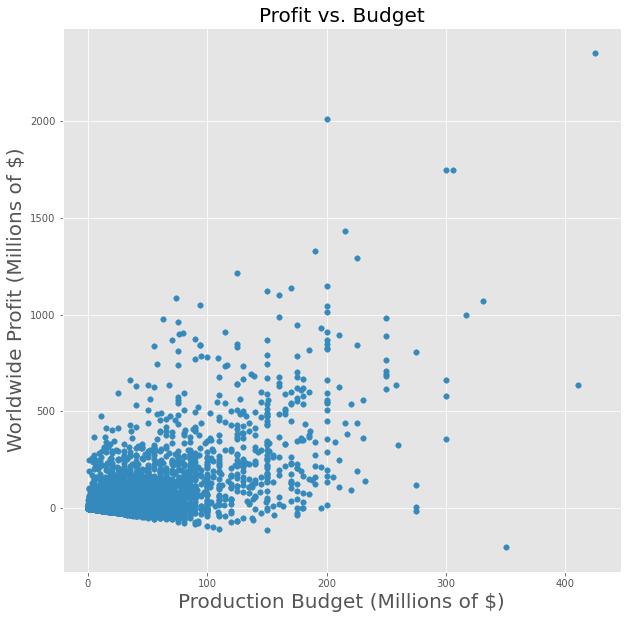

In [33]:
ax = df_93_hasgross.plot('production_budget', 'profit', kind = 'scatter', s=30)
ax.set_xlabel('Production Budget (Millions of $)', fontsize = 20)
ax.set_ylabel('Worldwide Profit (Millions of $)', fontsize = 20)
ax.set_title('Profit vs. Budget', fontsize = 20)

In [34]:
#I am dividing the movies into 10 groups based on their production budget.
#This is being added to the table as budget_range
groups, edges = pd.qcut(df_93_hasgross.production_budget,q=10, retbins=True)

df_93_hasgross['budget_range'] = groups

In [35]:
#Determine what percentage of movies were profitable in each budget range
df_93_hasgross['Profitable?'] = df_93_hasgross.profit > 0
df_grouped_by_budget = df_93_hasgross.groupby('budget_range').mean()
df_93_hasgross.groupby('budget_range').mean()

,id,production_budget,domestic_gross,worldwide_gross,profit,Profitable?
budget_range,,,,,,
"(0.00010000000000000005, 2.0]",51.486381,0.941134,3.371635,5.980046,5.038912,0.542802
"(2.0, 5.25]",46.819307,3.909761,10.541414,20.060942,16.151180,0.584158
"(5.25, 10.0]",50.174242,8.216687,13.898224,25.108439,16.891752,0.589015
"(10.0, 15.0]",48.898585,13.284434,21.566826,41.414233,28.129799,0.639151
"(15.0, 21.0]",52.804545,18.775966,28.304959,50.794581,32.018615,0.631818
"(21.0, 30.0]",51.162617,26.575009,38.498903,68.541881,41.966871,0.687850
"(30.0, 40.0]",51.063415,36.815488,46.323991,88.458261,51.642773,0.682927
"(40.0, 60.0]",51.502000,51.821826,59.320215,122.157440,70.335614,0.720000
"(60.0, 90.0]",50.612821,75.864997,90.945888,205.605607,129.740610,0.776923


Text(0.5, 1.0, 'Profit vs. Budget')

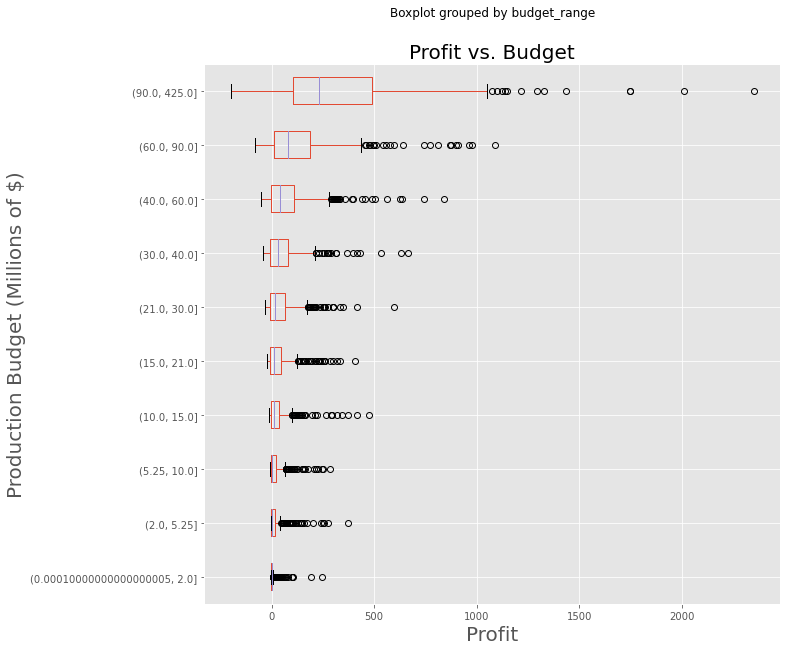

In [36]:
# Make a figure with boxplots for each range of budget
ax = df_93_hasgross.boxplot(column = 'profit', by = 'budget_range', vert=False)
ax.set_xlabel('Profit', fontsize = 20)
ax.set_ylabel('Production Budget (Millions of $)', fontsize = 20)
ax.set_title('Profit vs. Budget', fontsize = 20)

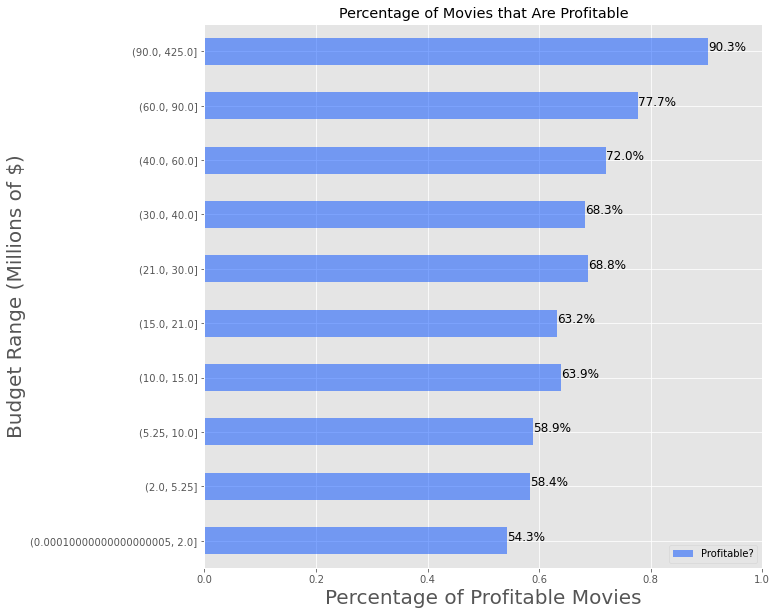

In [37]:
# This plot shows the percentage of movies that are profitable within each budget range
ax = df_grouped_by_budget.plot(y = 'Profitable?', kind='barh', color=(0.0,0.3,1,0.5), title = 'Percentage of Movies that Are Profitable')
ax.set_xlim((0,1))
ax.set_xlabel('Percentage of Profitable Movies', fontsize = 20)
ax.set_ylabel('Budget Range (Millions of $)', fontsize = 20)
for i,perc in enumerate(df_grouped_by_budget['Profitable?']):
    ax.text(perc, i, f"{round(100*perc,1)}%", fontsize = 12)

# Conclusions about budget
The plot shows that the higher the budget, the higher the profit tends to be. Importantly, as the budget increases, the probability of making a profit increases. Movies with budgets exceeding 90 million made money about 90% of the time while movies with budgets between 60 and 90 million only made money about 78% of the time.

Spending lots of money does not guarantee a big payday. Just look at Dark Phoenix. That movie had a budget of 350 million and it lost 200 million. We need to make sure that we spend the money wisely. That is what the other recommendations will help us do.

# Data Cleaning
The IMDB dataset, which has the most information, has unique IDs for each movie.
Unfortunately, those IDs can only be used to merge tables within the dataset, not with other non-IMDB datasets.
I can try using movie titles to combine, but that leads to issues because some movies were released under multiple
different titles.
There are three other issues when trying to merge
1. The merge method is case sensitive. This is the easiest to fix because I can just make all the titles lower case.
2. In the TheNumbers data, the original csv document with the data has some strange artifacts in place of special characters.
Characters like apostrophes, dashes, ellipses, and accented letters do not show up correctly. There are a small enough number of these (less than 100) that they can be fixed manually.
3. The hardest problem to fix is just that some titles differ slightly. For example, a movie can have a colon in it in one table, but not another. This is why cross-listing with movie_akas in the IMDB data doesn't really help. I also fixed these manually.

In [38]:
df_basics = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)

In [39]:
#The IMDB data starts at 2010
df_basics.start_year.min()

2010

In [40]:
#I am reading in the TheNumbers data again, but this time the version that has the titles cleaned
#I perform some of the same alterations to the columns, but this time, I will only keep 2010 and later.
df = pd.read_csv(dir_path+'Data/tn.movie_budgets_clean.csv')
df.release_date = pd.to_datetime(df.release_date, format = '%b %d, %Y')
df.production_budget = df.production_budget.replace('[\$,]', '', regex=True).astype(float)/1000000
df.domestic_gross = df.domestic_gross.replace('[\$,]', '', regex=True).astype(float)/1000000
df.worldwide_gross = df.worldwide_gross.replace('[\$,]', '', regex=True).astype(float)/1000000
df['profit'] = df.worldwide_gross - df.production_budget
df_10_hasgross = df[df.release_date >= '2010-01-01'][df.domestic_gross > 0]

<ipython-input-40-7609ece1c8fa>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_10_hasgross = df[df.release_date >= '2010-01-01'][df.domestic_gross > 0]


In [41]:
#Change the titles so it is all lower case. This will help when merging.
df_basics['primary_title'] = df_basics['primary_title'].str.lower()
df_10_hasgross['movie'] = df_10_hasgross['movie'].str.lower()

In [42]:
#Merge the data from TheNumbers with the IMDB basics table
df_merge = df_10_hasgross.merge(df_basics, left_on = 'movie', right_on = 'primary_title', how = 'left')

In [43]:
#This is a list of all the movies in the TheNumbers data that I couldn't match with something in the IMDB database
#This is mostly a list of foreign movies or low budget movies.
#I had to manually change quite a few movie titles so they would match, but it was at least reasonable to do by hand.
df_merge[df_merge.primary_title.isna()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
400,2,2010-04-22,oceans,80.000,19.422319,86.787530,6.787530,NaN,NaN,NaN,NaN,NaN,NaN
450,49,2010-05-28,agora,70.000,0.619423,38.992292,-31.007708,NaN,NaN,NaN,NaN,NaN,NaN
488,20,2015-09-04,tian jiang xiong shi,65.000,0.074070,122.519874,57.519874,NaN,NaN,NaN,NaN,NaN,NaN
497,42,2016-02-19,mei ren yu,60.720,3.229457,554.516671,493.796671,NaN,NaN,NaN,NaN,NaN,NaN
538,51,2016-02-05,xi you ji zhi sun wu kong san da bai gu jing,60.000,0.709982,194.058503,134.058503,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,39,2010-06-25,kynodontas,0.323,0.110248,1.373407,1.050407,NaN,NaN,NaN,NaN,NaN,NaN
2385,53,2012-11-09,nothing but a man,0.300,0.017241,0.017241,-0.282759,NaN,NaN,NaN,NaN,NaN,NaN
2430,31,2010-03-12,the exploding girl,0.040,0.025572,0.025572,-0.014428,NaN,NaN,NaN,NaN,NaN,NaN
2433,41,2010-10-15,down terrace,0.030,0.009812,0.009812,-0.020188,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#The total number of rows in the merged table is 2439.
#However, when I use drop duplicates on the movie title, there are only 1785 rows.
#This means there are a lot of duplicates.
#This can happen because multiple different movies in the IMDB dataset have the same title.
#I need to remove the duplicates
df_merge.drop_duplicates(subset = 'movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,2,2011-05-20,pirates of the caribbean: on stranger tides,410.600,241.063875,1045.663875,635.063875,tt1298650,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
1,3,2019-06-07,dark phoenix,350.000,42.762350,149.762350,-200.237650,tt6565702,dark phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
2,4,2015-05-01,avengers: age of ultron,330.600,459.005868,1403.013963,1072.413963,tt2395427,avengers: age of ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
3,5,2017-12-15,star wars: the last jedi,317.000,620.181382,1316.721747,999.721747,tt2527336,star wars: the last jedi,Star Wars: Episode VIII - The Last Jedi,2017.0,152.0,"Action,Adventure,Fantasy"
4,6,2015-12-18,star wars: episode vii - the force awakens,306.000,936.662225,2053.311220,1747.311220,tt2488496,star wars: episode vii - the force awakens,Star Wars: Episode VII - The Force Awakens,2015.0,136.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,38,2016-03-18,krisha,0.030,0.144822,0.144822,0.114822,tt4266638,krisha,Krisha,2015.0,83.0,Drama
2433,41,2010-10-15,down terrace,0.030,0.009812,0.009812,-0.020188,NaN,NaN,NaN,NaN,NaN,NaN
2434,45,2017-01-27,emily,0.027,0.003547,0.003547,-0.023453,tt1863224,emily,Emily,2011.0,NaN,Drama
2437,61,2010-04-02,breaking upwards,0.015,0.115592,0.115592,0.100592,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Get value counts of the movie titles to see what titles are being duplicated
df_merge.movie.value_counts()

home                24
brothers            13
the gift            13
the promise         10
robin hood          10
                    ..
j. edgar             1
trainwreck           1
le petit nicolas     1
top spin             1
the finest hours     1
Name: movie, Length: 1785, dtype: int64

In [46]:
#I can fix the duplicates by just going through the list and seeing which movies actually match.
#I made the matches by looking at the release date and start year as well as looking at the budget and gross
#I used the actual IMDB pages for each movie to double check the matches
df_merge[df_merge.movie == 'robin hood']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
28,39,2010-05-14,robin hood,210.0,105.487148,322.459006,112.459006,tt0955308,robin hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"
29,39,2010-05-14,robin hood,210.0,105.487148,322.459006,112.459006,tt2363363,robin hood,Robin Hood,2013.0,92.0,"Action,Drama"
30,39,2010-05-14,robin hood,210.0,105.487148,322.459006,112.459006,tt4532826,robin hood,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
31,39,2010-05-14,robin hood,210.0,105.487148,322.459006,112.459006,tt6858500,robin hood,Robin Hood,2018.0,NaN,None
32,39,2010-05-14,robin hood,210.0,105.487148,322.459006,112.459006,tt8558276,robin hood,Robin Hood,2017.0,60.0,"Action,Adventure,History"
309,9,2018-11-21,robin hood,99.0,30.824628,84.747441,-14.252559,tt0955308,robin hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"
310,9,2018-11-21,robin hood,99.0,30.824628,84.747441,-14.252559,tt2363363,robin hood,Robin Hood,2013.0,92.0,"Action,Drama"
311,9,2018-11-21,robin hood,99.0,30.824628,84.747441,-14.252559,tt4532826,robin hood,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
312,9,2018-11-21,robin hood,99.0,30.824628,84.747441,-14.252559,tt6858500,robin hood,Robin Hood,2018.0,NaN,None
313,9,2018-11-21,robin hood,99.0,30.824628,84.747441,-14.252559,tt8558276,robin hood,Robin Hood,2017.0,60.0,"Action,Adventure,History"


In [47]:
#This is a new CSV file I made that stores the movie_id that matches each movie that has duplicates
df_dup_remover = pd.read_csv(dir_path + 'Data/duplicate_remover.csv')

In [48]:
df_dup_remover

,movie,movie_id
0,home,tt2224026
1,brothers,tt3802576
2,the gift,tt4178092
3,the promise,tt4776998
4,silence,tt0490215
...,...,...
289,burlesque,tt1126591
290,flight,tt1907668
291,elysium,tt1535108
292,don't breathe,tt4160708


In [49]:
#I am going to loop over each movie in df_dup_remover and drop rows that don't have the right movie_id
for movie, movie_id in zip(df_dup_remover.movie, df_dup_remover.movie_id):
    if movie_id == 'remove': #Some movies did not actually match up with anything, so we remove them
        df_merge.drop(df_merge.index[df_merge.movie == movie], inplace = True)
    if movie != 'robin hood': #There are two robin hood movies, so I will handle them separately
        df_merge.drop(df_merge.index[(df_merge.movie == movie) & (df_merge.movie_id != movie_id)], inplace = True)

In [50]:
#There are two movies called robin hood that match a movie from the IMDB database
#I need to treat these cases separately because the code above would just get rid of everything
df_merge.drop(df_merge.index[(df_merge.movie == 'robin hood') & (df_merge.movie_id != 'tt0955308') & (df_merge.id == 39)], inplace = True)
df_merge.drop(df_merge.index[(df_merge.movie == 'robin hood') & (df_merge.movie_id != 'tt4532826') & (df_merge.id == 9)], inplace = True)
#There are two movies called the square, but only one of them matches. Remove the other
df_merge.drop(df_merge.index[(df_merge.movie == 'the square') & (df_merge.id == 10)], inplace = True)

In [51]:
#Now, the combined data should not include any duplicates
df_merge.movie.value_counts()

robin hood                                 2
barbecue                                   1
evil dead                                  1
shame                                      1
night at the museum: secret of the tomb    1
                                          ..
jupiter ascending                          1
resident evil: afterlife                   1
50 to 1                                    1
les herbes folles                          1
the finest hours                           1
Name: movie, Length: 1783, dtype: int64

Now there are no repeats in the dataset.
Just so I don't have to rerun the cells above every time I restart the kernel, I am going to save this DataFrame as a CSV file.

In [52]:
#Select the cells I want to keep (I am excluding redundant cells)
df_merge = df_merge[['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'movie_id', 'runtime_minutes', 'genres']]

In [53]:
df_merge.to_csv(dir_path + 'Data/TheNumbers_IMDB_Merge.csv')

# Genres

Using the movies that are listed in both TheNumbers and the IMDB datasets, I will look at how the genre is related to both the profit and the rating.

In [54]:
df_merge = pd.read_csv(dir_path + 'Data/TheNumbers_IMDB_Merge.csv')

In [55]:
#Convert release date to datetime
df_merge.release_date = pd.to_datetime(df.release_date, format = '%b %d, %Y')

In [56]:
df_ratings = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

In [57]:
df_merge = df_merge.merge(df_ratings, left_on = 'movie_id', right_on = 'movie_id', how = 'inner')

In [58]:
#Make it so the genres are all lower case
df_merge['genres'] = df_merge['genres'].str.lower()

Text(0.5, 1.0, 'Rating vs. Budget')

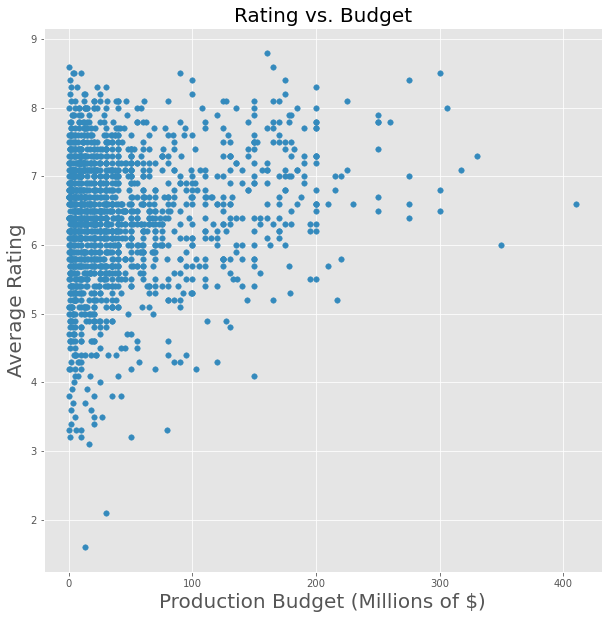

In [59]:
#I also looked at Rating vs. Budget
#It seems that very high budget movies have a higher floor than low budget movies in terms of ratings
ax = df_merge.plot('production_budget', 'averagerating', kind = 'scatter', s=30)
ax.set_xlabel('Production Budget (Millions of $)', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Rating vs. Budget', fontsize = 20)

In [60]:
#The IMDB data lists multiple genres per movie as as single string separated by commas.
#I want to get a list of unique genres so I can look at each genre separately.
#I found a nice snippet of code from https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
from sklearn.feature_extraction.text import CountVectorizer

temp = df_merge.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
unique_genres =  vec.get_feature_names()
unique_genres

['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western']

In [61]:
#Find the average rating of each genre and sort the genres by that average
avg = []
for genre in unique_genres:
    genre_avg = df_merge[df_merge.genres.str.contains(genre)].averagerating.median()
    avg.append(genre_avg)
    
avg    

[6.4,
 6.6,
 6.7,
 7.1,
 6.3,
 6.5,
 6.95,
 6.7,
 6.3,
 6.2,
 7.0,
 5.9,
 6.4,
 6.15,
 6.3,
 6.4,
 6.5,
 7.0,
 6.3,
 6.3,
 6.6]

In [62]:
avg_and_genres = sorted(list(zip(avg,unique_genres)))
sorted_genres = [avg_and_genres[i][1] for i in range(len(avg_and_genres))]
sorted_genres

['horror',
 'musical',
 'fantasy',
 'comedy',
 'family',
 'mystery',
 'thriller',
 'war',
 'action',
 'music',
 'romance',
 'crime',
 'sci-fi',
 'adventure',
 'western',
 'animation',
 'drama',
 'documentary',
 'history',
 'sport',
 'biography']

Text(0, 0.5, 'Genre')

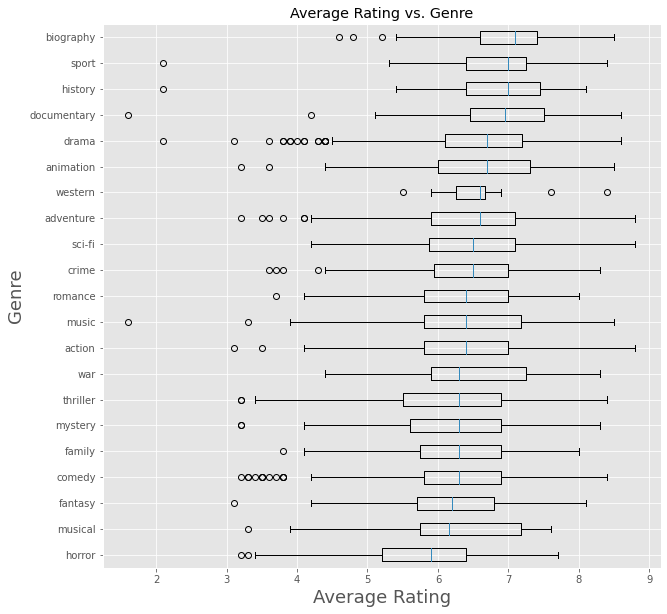

In [63]:
#Average rating vs. genre
fig, ax = plt.subplots(figsize = (10,10))

n=0
for genre in sorted_genres:
    #df_sub = df_merge[(df_merge.genres.str.contains(genre)) & (df_merge.production_budget > 10)]
    df_sub = df_merge[df_merge.genres.str.contains(genre)]
    ax.boxplot(df_sub.averagerating, vert = False, positions = [n], widths = 0.5)
    n = n + 1
ax.set_yticklabels(sorted_genres)
ax.set_title('Average Rating vs. Genre')
ax.set_xlabel('Average Rating', fontsize = 18)
ax.set_ylabel('Genre', fontsize = 18)

In terms of rating, it seems like people enjoy true stories because the highest rated genres are biography, history, and documentary. Sports movies are also quite high. Some of these movies are also based on true stories.
The worst rated are horror, musical, fantasy, and comedy.

The truth is that the movies have a wide range of ratings and you can have a highly rated horror movie or a low-rated biography.

Now to see how the genres compare financially.

In [64]:
#Find the average profit of each genre and sort the genres by that average
avg = []
for genre in unique_genres:
    genre_avg = df_merge[df_merge.genres.str.contains(genre)].profit.median()
    avg.append(genre_avg)
    
avg    

[69.59089,
 132.98126100000002,
 166.56231200000002,
 16.0067175,
 31.887901500000005,
 13.844132,
 0.38636800000000004,
 12.141616999999998,
 55.462444500000004,
 53.461527,
 8.099931,
 30.74923,
 9.1696265,
 16.878986499999996,
 36.824065999999995,
 16.649645000000003,
 110.0982585,
 7.3621764999999995,
 33.866088000000005,
 -1.315295,
 -1.185188]

In [65]:
avg_and_genres = sorted(list(zip(avg,unique_genres)))
sorted_genres = [avg_and_genres[i][1] for i in range(len(avg_and_genres))]
sorted_genres

['war',
 'western',
 'documentary',
 'sport',
 'history',
 'music',
 'drama',
 'crime',
 'biography',
 'romance',
 'musical',
 'horror',
 'comedy',
 'thriller',
 'mystery',
 'fantasy',
 'family',
 'action',
 'sci-fi',
 'adventure',
 'animation']

Text(0, 0.5, 'Genre')

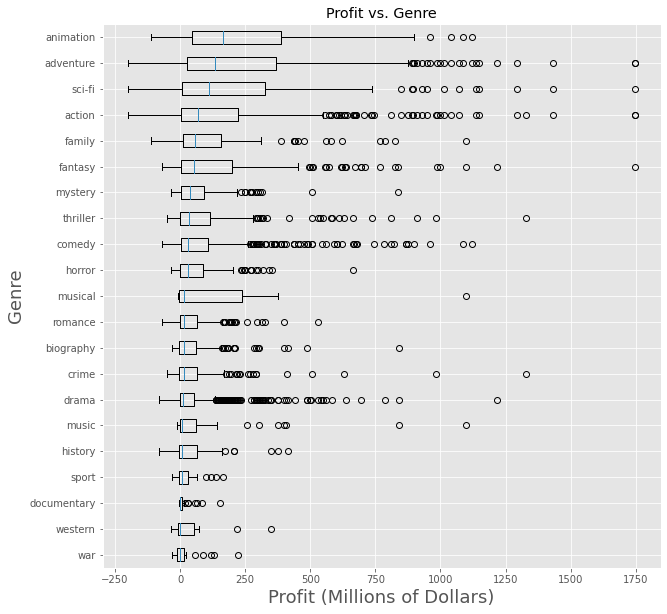

In [66]:
#Profit vs. genre
fig, ax = plt.subplots(figsize = (10,10))

n=0
for genre in sorted_genres:
    #df_sub = df_merge[(df_merge.genres.str.contains(genre)) & (df_merge.production_budget > 10)]
    df_sub = df_merge[df_merge.genres.str.contains(genre)]
    ax.boxplot(df_sub.profit, vert = False, positions = [n], widths = 0.5)
    n = n + 1
ax.set_yticklabels(sorted_genres)
ax.set_title('Profit vs. Genre')
ax.set_xlabel('Profit (Millions of Dollars)', fontsize = 18)
ax.set_ylabel('Genre', fontsize = 18)

People love their documentaries, but that doesn't mean those movies make money. Documentaries, biographies, and history movies are near the bottom in profits. The most profitable movies are animated movies, adventure movies, and sci-fi.
The average is higher due to a small number of very successful movies. Inception, Interstellar, and Avengers: Infinity War all fall in the adventure and sci-fi genres. They are the bigger outliers to the right. However, the adventure and sci-fi genres do still have some of the highest MEDIAN profits, showing that it is not just a matter of the box office hits skewing the data.

This does not necessarily mean I recommend making only animated sci-fi, adventure movies. Most of the genres include multiple highly profitable movies (the only genres that do not include at least one movie with a profit of 500 million dollars are horror, western, history, romance, sport, war, and documentary). These genres are probably not what we should aim for if we want to make a major profit.

Idea to do: Make a horizontal bar plot showing probability of making profit and probability of making big profit (over 100 million dollars)

<ipython-input-67-33097a5fd156>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sorted_genres)


Text(0, 0.5, 'Genre')

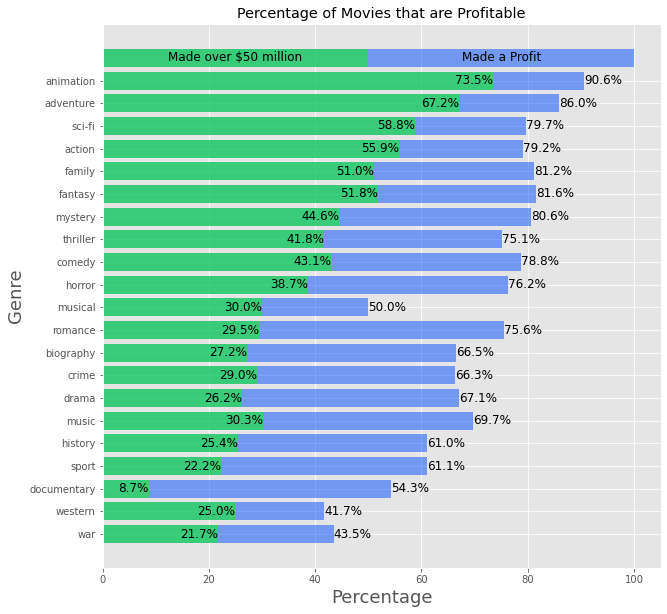

In [67]:
#Percentage of movies that are profitable within each genre
fig, ax = plt.subplots(figsize = (10,10))

n=0
for genre in sorted_genres:
    df_sub = df_merge[df_merge.genres.str.contains(genre)]
    perc = 100 * len(df_sub[df_sub.profit > 0.0]) / len(df_sub)
    ax.barh(width = perc, height = 0.8, y = n, color = (0.0, 0.3, 1, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'left', verticalalignment = 'center')
    
    perc = 100 * len(df_sub[df_sub.profit > 50.0]) / len(df_sub)
    ax.barh(width = perc, height = 0.8, y = n, color = (0.0, 1, 0, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'right', verticalalignment = 'center')
    
    n = n + 1
    
ax.barh(width = 100, height = 0.8, y = n, color = (0.0 , 0.3 , 1, 0.5))
ax.barh(width = 50, height = 0.8, y = n, color = (0.0, 1, 0.0, 0.5))
ax.text(25, n, "Made over $50 million", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
ax.text(75, n, "Made a Profit", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
    
ax.set_yticklabels(sorted_genres)
ax.set_yticks(range(len(sorted_genres)))
ax.set_title('Percentage of Movies that are Profitable')
ax.set_xlabel('Percentage', fontsize = 18)
ax.set_ylabel('Genre', fontsize = 18)

# Genre Conclusion:

While a wide variety of genres are capable of earning large profits and high ratings, the most successful genres are animation, adventure, sci-fi, and action.
Movies in the war, western, and sports genres are not as successful. Documentaries are very popular (high ratings), but don't typically make much money.

# Star Power
Next, I will look at how the profit and ratings of movies are affected by the people who make those movies.
This will be the hardest to code.
Plan: For each movie, create a "star power" rating. I will look at the principal people involved in each movie, then I will count how many movies those people have previously done. I can also require that those movies had a certain level of success (profit above 50 million). To do this, I will need to loop through each movie and find the people associated with that movie (using the principals table). Then, I will sum up all of the movies those people have PREVIOUSLY done to get the star power rating.

PROBLEM: If the movies in my main dataset start in 2010, then this limits what I can do with this star power metric. This means movies released prior to 2010 will not contribute to the star power rating.

How to fix it: I can specifically look at movies from the last 6 years and use star power since 2010. This should still work pretty well because more recent starring roles are probably more influential than ones from decades ago.

In [68]:
conn = sqlite3.connect(dir_path+'im.db/im.db')

In [69]:
# Read in the principals table from IMDB
# I want to do this separately for actors/actresses and directors (I could also do producers, cinematographers, etc.)
df_actors = pd.read_sql("""
SELECT movie_id, person_id, category
  FROM principals
  WHERE category IN ('actor', 'actress')
;
""", conn)

# Directors
df_directors = pd.read_sql("""
SELECT movie_id, person_id, category
  FROM principals
  WHERE category IN ('director')
;
""", conn)

In [70]:
#Create a new column for actor/actress star power
df_merge['act_star_power'] = 0.0
df_merge['dir_star_power'] = 0.0

In [71]:
# This is for actors/actresses only
# Loop over movies. I will go ahead and measure the star power for every movie, but I will probably only use more recent
# movies in the analysis.
star_power_list = []
for mov_id in df_merge.movie_id:
    release_date = df_merge[df_merge.movie_id == mov_id].release_date
    person_ids = list(df_actors[df_actors.movie_id == mov_id].person_id)
    df_mov_with_same_people = df_actors[df_actors.person_id.isin(person_ids)].merge(df_merge, left_on = 'movie_id', \
                                                                                    right_on = 'movie_id', how = 'left')
    star_power_list.append(len(df_mov_with_same_people[(df_mov_with_same_people.release_date < release_date.values[0]) & \
                                                       (df_mov_with_same_people.profit > 100)]))

df_merge['act_star_power'] = star_power_list

In [72]:
# This is for directors only
# Loop over movies. I will go ahead and measure the star power for every movie, but I will probably only use more recent
# movies in the analysis.
star_power_list = []
for mov_id in df_merge.movie_id:
    release_date = df_merge[df_merge.movie_id == mov_id].release_date
    person_ids = list(df_directors[df_directors.movie_id == mov_id].person_id)
    df_mov_with_same_people = df_directors[df_directors.person_id.isin(person_ids)].merge(df_merge, left_on = 'movie_id', \
                                                                                    right_on = 'movie_id', how = 'left')
    star_power_list.append(len(df_mov_with_same_people[(df_mov_with_same_people.release_date < release_date.values[0]) & \
                                                       (df_mov_with_same_people.profit > 100)]))

df_merge['dir_star_power'] = star_power_list

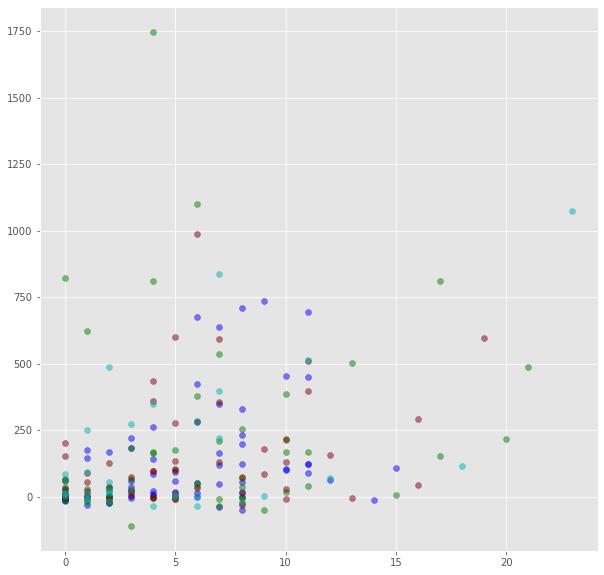

In [73]:
#Make a plot of actor star power for movies since 2016
#Each year has a separate color.
fig, ax = plt.subplots(figsize = (10,10))

df_year = df_merge[(df_merge.release_date > '2016-01-01') & (df_merge.release_date < '2017-01-01')]
ax.scatter(x = df_year.act_star_power, y = df_year.profit, color = (0,0,1,0.5))

df_year = df_merge[(df_merge.release_date > '2017-01-01') & (df_merge.release_date < '2018-01-01')]
ax.scatter(x = df_year.act_star_power, y = df_year.profit, color = (0.0,0.5,0.0,0.5))

df_year = df_merge[(df_merge.release_date > '2018-01-01') & (df_merge.release_date < '2019-01-01')]
ax.scatter(x = df_year.act_star_power, y = df_year.profit, color = (0.5,0.0,0.0,0.5))

df_year = df_merge[(df_merge.release_date > '2019-01-01') & (df_merge.release_date < '2020-01-01')]
ax.scatter(x = df_year.act_star_power, y = df_year.profit, color = (0.0,0.7,0.7,0.5))

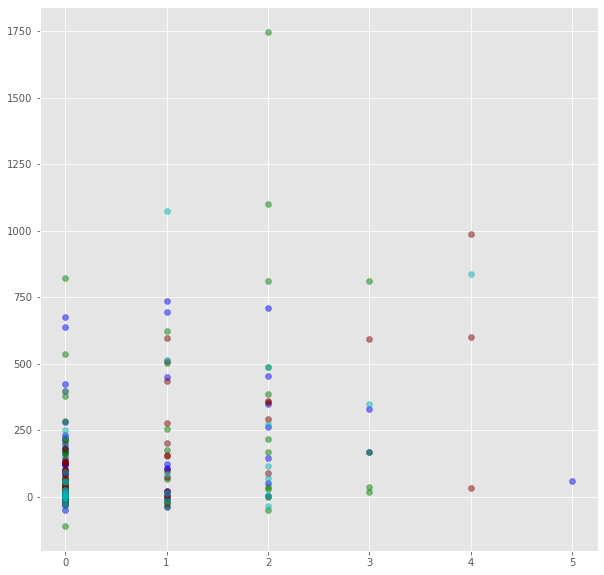

In [74]:
#Plot of director star power
fig, ax = plt.subplots(figsize = (10,10))

df_year = df_merge[(df_merge.release_date > '2016-01-01') & (df_merge.release_date < '2017-01-01')]
ax.scatter(x = df_year.dir_star_power, y = df_year.profit, color = (0,0,1,0.5))

df_year = df_merge[(df_merge.release_date > '2017-01-01') & (df_merge.release_date < '2018-01-01')]
ax.scatter(x = df_year.dir_star_power, y = df_year.profit, color = (0.0,0.5,0.0,0.5))

df_year = df_merge[(df_merge.release_date > '2018-01-01') & (df_merge.release_date < '2019-01-01')]
ax.scatter(x = df_year.dir_star_power, y = df_year.profit, color = (0.5,0.0,0.0,0.5))

df_year = df_merge[(df_merge.release_date > '2019-01-01') & (df_merge.release_date < '2020-01-01')]
ax.scatter(x = df_year.dir_star_power, y = df_year.profit, color = (0.0,0.7,0.7,0.5))

In [75]:
# Make a new DateFrame that only includes movies since 2016
# The reason for doing this is because movies prior to that won't have very accurate star power ratings
df_cut = df_merge[df_merge.release_date > '2016-01-01']

<ipython-input-76-582b1f3e90fc>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"[{star_power_bins[n]}, {star_power_bins[n+1]})" for n in range(3)], fontsize = 18)
<ipython-input-76-582b1f3e90fc>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0,120,20),fontsize = 18)


Text(0, 0.5, 'Actor Star Power')

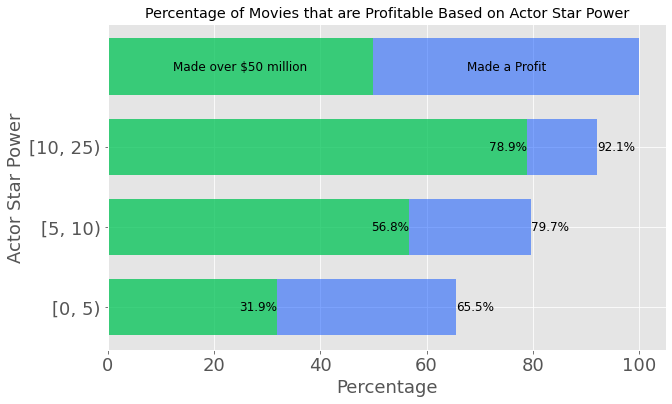

In [76]:
#Percentage of movies that are profitable based on actor/actress star power
fig, ax = plt.subplots(figsize = (10,6))

star_power_bins = [0,5,10,25]

for n in range(3):
    perc = 100 * len(df_cut[(df_cut.act_star_power >= star_power_bins[n]) & (df_cut.act_star_power < star_power_bins[n+1]) \
                        & (df_cut.profit > 0.0)]) / \
        len(df_cut[(df_cut.act_star_power >= star_power_bins[n]) & (df_cut.act_star_power < star_power_bins[n+1])])

    ax.barh(width = perc, height = 0.7, y = n, color = (0.0, 0.3, 1.0, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'left', verticalalignment = 'center')
    
    perc = 100 * len(df_cut[(df_cut.act_star_power >= star_power_bins[n]) & (df_cut.act_star_power < star_power_bins[n+1]) \
                        & (df_cut.profit > 50.0)]) / \
        len(df_cut[(df_cut.act_star_power >= star_power_bins[n]) & (df_cut.act_star_power < star_power_bins[n+1])])

    ax.barh(width = perc, height = 0.7, y = n, color = (0.0, 1, 0.0, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'right', verticalalignment = 'center')

n = n + 1
ax.barh(width = 100, height = 0.7, y = n, color = (0.0 , 0.3 , 1, 0.5))
ax.barh(width = 50, height = 0.7, y = n, color = (0.0, 1, 0.0, 0.5))
ax.text(25, n, "Made over $50 million", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
ax.text(75, n, "Made a Profit", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
    
ax.set_yticklabels([f"[{star_power_bins[n]}, {star_power_bins[n+1]})" for n in range(3)], fontsize = 18)
ax.set_xticklabels(np.arange(0,120,20),fontsize = 18)
ax.set_yticks(range(3))
ax.set_title('Percentage of Movies that are Profitable Based on Actor Star Power')
ax.set_xlabel('Percentage', fontsize = 18)
ax.set_ylabel('Actor Star Power', fontsize = 18)

<ipython-input-77-b9d7c6393af7>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(5), fontsize = 18)
<ipython-input-77-b9d7c6393af7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0,120,20),fontsize = 18)


Text(0, 0.5, 'Director Star Power')

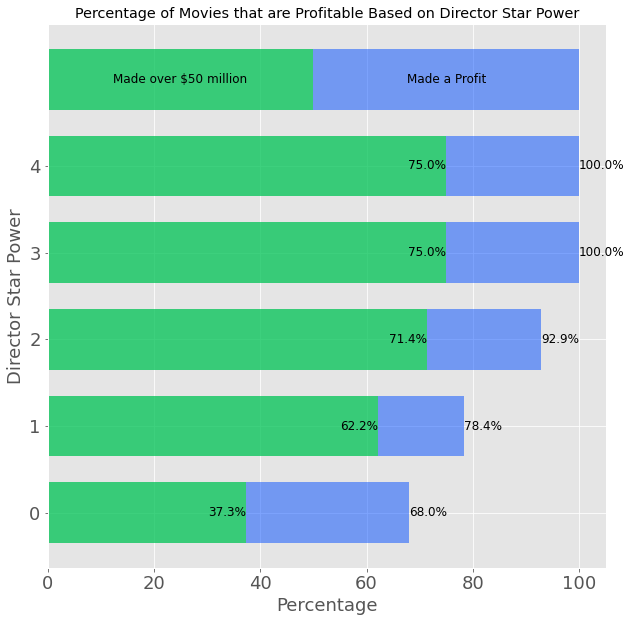

In [77]:
#Percentage of movies that are profitable based on director star power
fig, ax = plt.subplots(figsize = (10,10))

star_power_bins = [0,1,2,3,4,5,6]

for n in range(5):
    perc = 100 * len(df_cut[(df_cut.dir_star_power >= star_power_bins[n]) & (df_cut.dir_star_power < star_power_bins[n+1]) \
                        & (df_cut.profit > 0.0)]) / \
        len(df_cut[(df_cut.dir_star_power >= star_power_bins[n]) & (df_cut.dir_star_power < star_power_bins[n+1])])

    ax.barh(width = perc, height = 0.7, y = n, color = (0.0, 0.3, 1.0, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'left', verticalalignment = 'center')
    
    perc = 100 * len(df_cut[(df_cut.dir_star_power >= star_power_bins[n]) & (df_cut.dir_star_power < star_power_bins[n+1]) \
                        & (df_cut.profit > 50.0)]) / \
        len(df_cut[(df_cut.dir_star_power >= star_power_bins[n]) & (df_cut.dir_star_power < star_power_bins[n+1])])

    ax.barh(width = perc, height = 0.7, y = n, color = (0.0, 1, 0.0, 0.5))
    ax.text(perc, n, f"{round(perc,1)}%", fontsize = 12, horizontalalignment = 'right', verticalalignment = 'center')

n = n + 1
ax.barh(width = 100, height = 0.7, y = n, color = (0.0 , 0.3 , 1, 0.5))
ax.barh(width = 50, height = 0.7, y = n, color = (0.0, 1, 0.0, 0.5))
ax.text(25, n, "Made over $50 million", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
ax.text(75, n, "Made a Profit", fontsize = 12, horizontalalignment = 'center', verticalalignment = 'center')
    
ax.set_yticklabels(range(5), fontsize = 18)
ax.set_xticklabels(np.arange(0,120,20),fontsize = 18)
ax.set_yticks(range(5))
ax.set_title('Percentage of Movies that are Profitable Based on Director Star Power')
ax.set_xlabel('Percentage', fontsize = 18)
ax.set_ylabel('Director Star Power', fontsize = 18)

## Casting/Directing Conclusions
Hiring actors/actresses and directors who have previously been involved in successful, profitable movies does seem to be correlated with future success.
This could be because those people are talented and are therefore more likely to help create a good movie. It could also be because having big, recognizable names attached to a movie helps get more attention on that movie so that people will go see it, regardless of its actual quality. It is easier to sell a movie starring Tom Hanks then a movie starring John Whoever, even if Mr. Whoever is very talented.